<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Часть первая
*Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).*


In [0]:
#добавляем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Выбираем распределение Лапласа  с $\alpha = 3, \beta = 0$:

In [0]:
# задаем распредление рапласа с параметрами 3 и 0
laplace_rv = sts.laplace(0,3)
sample = laplace_rv.rvs(1000)

In [0]:
x = np.linspace(-10,10,1000)
density = laplace_rv.pdf(x)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


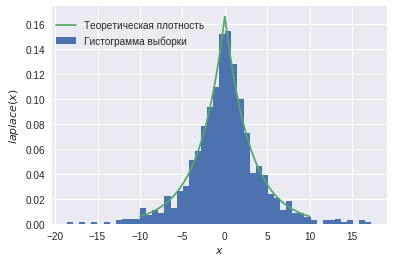

In [238]:
plt.hist(sample, bins = 50, normed=True,  label='Гистограмма выборки')
plt.plot(x, density,  label='Теоретическая плотность')
plt.ylabel('$laplace(x)$')
plt.xlabel('$x$')
plt.legend(loc=(0.0, 0.8))


###Часть вторая


*Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).*



Cредняя равна параметру $\beta$: **0**

Дисперсия равна ${\displaystyle {\frac {2}{\alpha ^{2}}}}$: ${\displaystyle {\frac {2}{3 ^{2}}}}$

Среднеквадратическое отклонение определяется как квадратный корень из дисперсии случайной величины: ${\displaystyle \sigma ={\sqrt {D[X]}}}$




In [0]:
import math
d = 2/3**2
d = math.sqrt(d)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


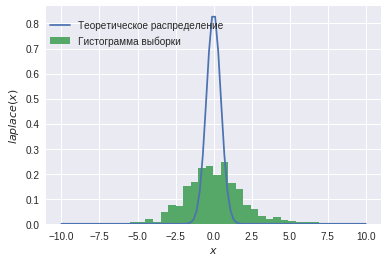

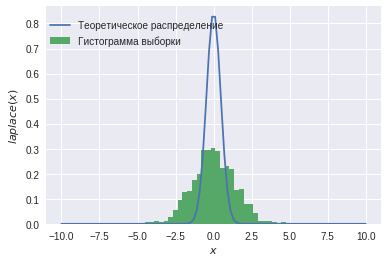

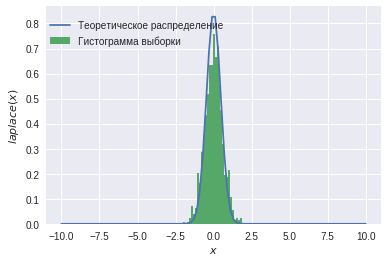

In [239]:
for n in [5,10,50]:
  avg_lap = []
  for i in range(1000):
    sample_lap = laplace_rv.rvs(n)
    avg_lap.append(sum(sample_lap)/n)
  x = np.linspace(-10, 10, 100)
  norm_rv = sts.norm(0, d)
  pdf = norm_rv.pdf(x)
  plt.plot(x, pdf, label='Теоретическое распределение')
  plt.hist(avg_lap, bins = 30, normed=True,  label='Гистограмма выборки')
  plt.ylabel('$laplace(x)$')
  plt.xlabel('$x$')
  plt.legend(loc=(0.0, 0.8))
  plt.show() 

*Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?*

Точность аппроксимации увеличивается с ростом n. 